In [89]:
train_generator = train_datagen.flow_from_directory(
    'data/Train',
    target_size=(32, 32),
    batch_size=8,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    'data/Train',
    target_size=(32, 32),
    batch_size=8,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [74]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

img_size = 32  # you can adjust this

X = []
y = []

for img_file in os.listdir(train_path):
    if img_file.endswith('.png'):
        img_path = os.path.join(train_path, img_file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (img_size, img_size))
        X.append(img)

        # Extract label from filename (before '.png')
        label = int(img_file.split('.')[0])
        y.append(label)

X = np.array(X) / 255.0
y = to_categorical(y, num_classes=43)

print(f"Loaded {X.shape[0]} images")
print(f"Labels shape: {y.shape}")


Loaded 43 images
Labels shape: (43, 43)


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")


Training set size: 34
Validation set size: 9


In [78]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(img_size, img_size, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)


In [85]:
batch_size = 8

datagen.fit(X_train)

# Calculate steps per epoch safely
steps_per_epoch = max(len(X_train) // batch_size, 1)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=(X_val, y_val)
)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.1574 - loss: 3.2063 - val_accuracy: 0.0000e+00 - val_loss: 4.9598
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3750 - loss: 2.4917 - val_accuracy: 0.0000e+00 - val_loss: 5.0890
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0934 - loss: 3.1708 - val_accuracy: 0.0000e+00 - val_loss: 5.5998
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1250 - loss: 3.3784 - val_accuracy: 0.0000e+00 - val_loss: 5.6054
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 3.3619 - val_accuracy: 0.0000e+00 - val_loss: 5.2526
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1250 - loss: 3.0008 - val_accuracy: 0.0000e+00 - val_loss: 5.2068
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1084 - loss: 3.3964 - val_accuracy: 0.0000e+00 - val_loss: 5.0210
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1250 - loss: 3.2482 - val_accu

In [86]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")

1/1 - 0s - 67ms/step - accuracy: 0.0000e+00 - loss: 5.1269
Validation loss: 5.1269
Validation accuracy: 0.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


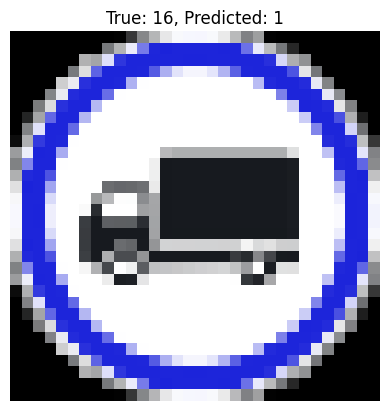

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


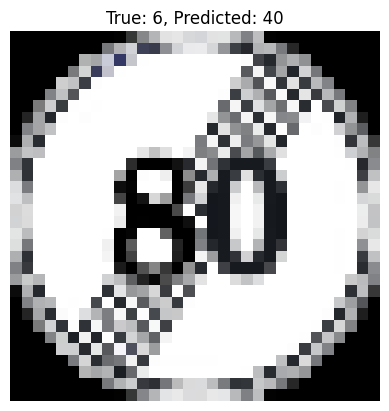

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


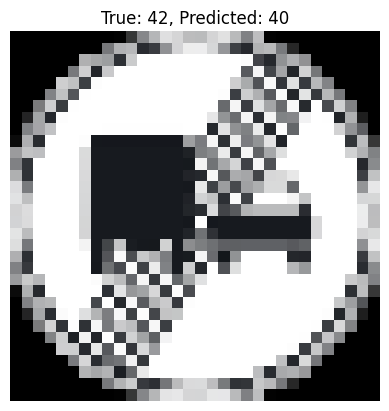

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


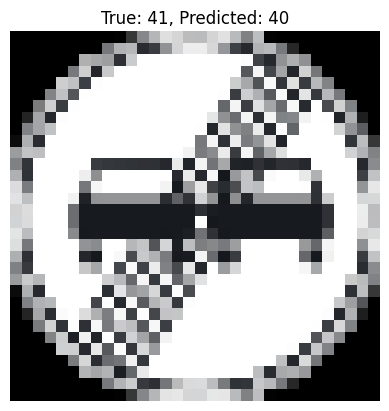

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


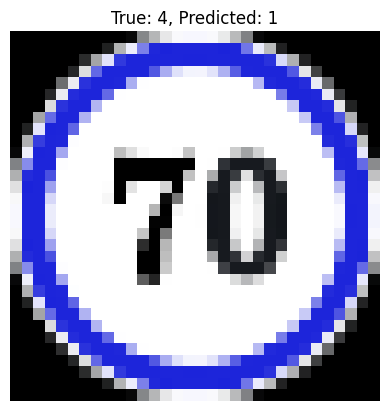

In [87]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.random.choice(len(X_val), 5, replace=False)
for i in indices:
    img = X_val[i]
    true_label = np.argmax(y_val[i])
    prediction = np.argmax(model.predict(img[np.newaxis, ...]))
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {prediction}")
    plt.axis('off')
    plt.show()
